In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport

In [69]:
file_path = r"C:\Users\daniel.s.ross\OneDrive - Accenture Federal Services\Foundations of ML\United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv"
df = pd.read_csv(file_path)

In [70]:
df['submission_date'] = pd.to_datetime(df['submission_date'])
df['submission_month_year'] = df['submission_date'].dt.to_period('M').astype(str)
df['death_rate'] = df['tot_death']/df['tot_cases']
df = df.drop(['conf_cases', 'pnew_case', 'prob_cases', 'conf_death', 'prob_death', 'pnew_death', 'consent_cases', 'consent_deaths', 'created_at'], axis=1)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 0 to 60059
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   submission_date        60060 non-null  datetime64[ns]
 1   state                  60060 non-null  object        
 2   tot_cases              60060 non-null  int64         
 3   new_case               60060 non-null  int64         
 4   tot_death              60060 non-null  int64         
 5   new_death              60060 non-null  int64         
 6   submission_month_year  60060 non-null  object        
 7   death_rate             55956 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.7+ MB


In [152]:
df_month = df.groupby(['submission_month_year'])['new_death'].sum().max

In [113]:
df_month = df.groupby('submission_month_year')['new_death'].sum().to_frame()
df_month.loc[df_month['new_death'] == df_month['new_death'].max()]


,new_death
submission_month_year,
2021-01,98039


In [114]:

df_state = df.groupby('state')['new_death'].sum().to_frame()
df_state.loc[df_state['new_death'] == df_state['new_death'].max()]

,new_death
state,
CA,95604


In [115]:
df_month_state = df.groupby(['submission_month_year','state'])['new_death'].sum().to_frame()
df_month_state.loc[df_month_state['new_death'] == df_month_state['new_death'].max()]

,,new_death
submission_month_year,state,
2020-04,NYC,16734


<Axes: title={'center': 'Deaths by Month (All)'}, xlabel='submission_month_year'>

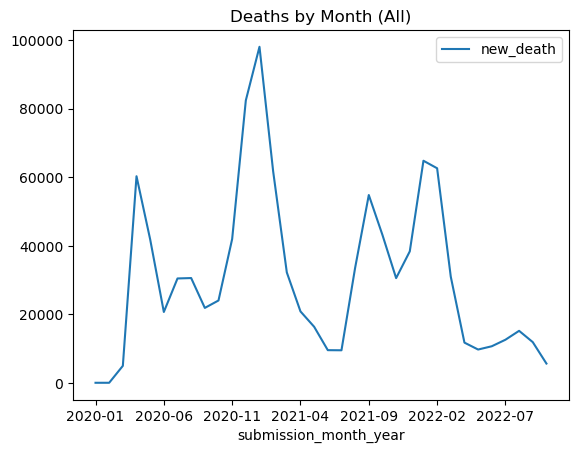

In [106]:
df_month.plot(title='Deaths by Month (All)')

<Axes: title={'center': 'Deaths by State'}, xlabel='state'>

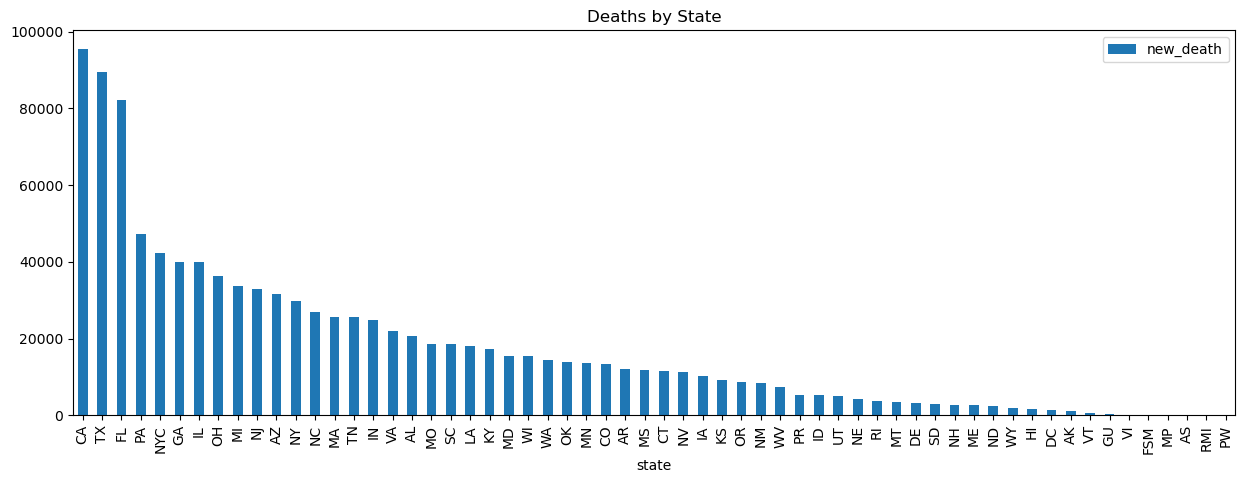

In [122]:
df_state.sort_values('new_death', ascending=False).plot(kind='bar', title='Deaths by State', figsize=(15, 5))

In [123]:
df_month.head()

,new_death
submission_month_year,
2020-01,0
2020-02,2
2020-03,4943
2020-04,60265
2020-05,41831


In [124]:
df_state.head()

,new_death
state,
AK,1186
AL,20526
AR,12106
AS,34
AZ,31693


In [125]:
df_month_state.head()

new_death
submission_month_year state           
2020-01               AK             0
                      AL             0
                      AR             0
                      AS             0
                      AZ             0